In [1]:
from pandas.io.data import DataReader
from datetime import datetime 

ibm = DataReader("IBM",  "yahoo", datetime(2009,1,1), datetime(2014,12,31))
print ibm.head()

             Open   High    Low  Close   Volume  Adj Close
Date                                                      
2009-01-02  83.89  87.59  83.89  87.37  7558200      77.31
2009-01-05  86.42  87.67  86.18  86.82  8315700      76.82
2009-01-06  87.11  90.41  86.37  89.23  9649500      78.95
2009-01-07  87.83  88.80  87.12  87.79  8455100      77.68
2009-01-08  87.81  88.14  85.98  87.18  7231800      77.14


We now calculate daily and annual returns using the data received from Yahoo.

In [2]:
import numpy as np
import pandas as pd

stkp = ibm["Adj Close"]
daily_returns = np.divide(np.subtract(stkp[1:], stkp[:-1]), stkp[1:])
annual_stkp = ibm.resample('A')['Adj Close']
annual_returns = np.divide(np.subtract(annual_stkp[1:], annual_stkp[:-1]), annual_stkp[1:]) 

<h3>Part a</h3>

In [3]:
print 'Mean daily return: %s' % daily_returns.mean()
print 'Mean annual return: %s' % annual_returns.mean()

Mean daily return: 0.000397039744625
Mean annual return: 0.107214425871


<h3>Part b</h3>

In [4]:
print 'Daily standard deviation: %s' % daily_returns.std()
print 'Annual standard deviation: %s' % annual_returns.std()

Daily standard deviation: 0.0128158162773
Annual standard deviation: 0.121014996882


<h3>Part c</h3>

Histogram of returns for 1 year:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b8a08ea10>]], dtype=object)

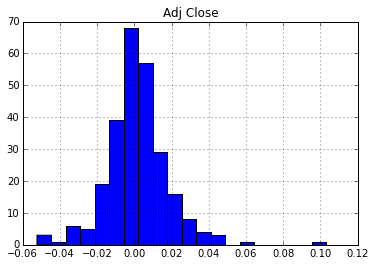

In [5]:
%matplotlib inline

print 'Histogram of returns for 1 year:'
df_year = pd.DataFrame(daily_returns[:260])
df_year.hist(bins=20)

<h3>Part d</h3>

Histogram of returns for whole horizon:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b89c8b650>]], dtype=object)

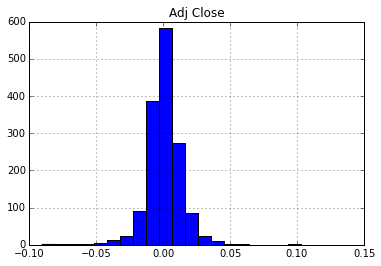

In [6]:
print 'Histogram of returns for whole horizon:'
df_entire = pd.DataFrame(daily_returns)
df_entire.hist(bins=20)

<h3>Part e</h3>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b89b3b1d0>]], dtype=object)

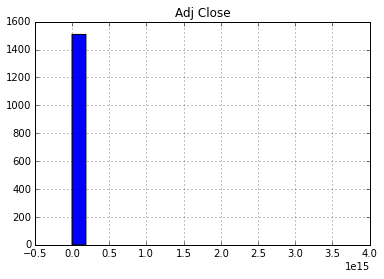

In [7]:
annualized_returns = np.subtract(np.power(np.add(1, daily_returns), 365), 1)
df_annualized = pd.DataFrame(annualized_returns)
df_annualized.hist(bins=20)

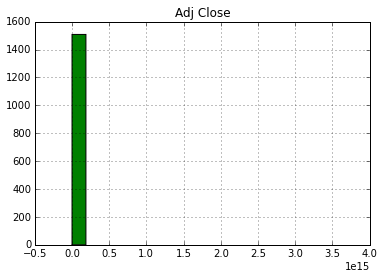

In [8]:
axs = df_year.hist()

for ax, (colname, values) in zip(axs.flat, df_annualized.iteritems()):
    values.hist(ax=ax, bins=20)

The calculated annualized returns seem to have a very large range with an extended tail. They are very heavily biased close to 0, however.

The curve we see does not appear to be normal because of the high variance.

<h3>Part f</h3>

The probability of losing 10% or more after 20 days can be found by applying the CLT to the normal distribution.

$P(\chi \leq -0.1) \approx 
P\left(Z \leq \frac{-0.1 - \mu}{\sigma/\sqrt{20}}\right)$

In [9]:
from scipy.stats import norm
import math

mean = daily_returns.mean()
std_dev = daily_returns.std()
print norm.pdf((-.01 - mean)/(std_dev/math.sqrt(20)))

0.000552825315516


This gives us an very small possiblity of losing that amount over 20 days, at about 0.05%.

<h3>Part g</h3>

In [10]:
l = len(daily_returns)
count = 0
it = 100000
for i in range(it):
    values = []
    for j in range(20):
        values.append(daily_returns[np.random.randint(0, l)])
        
    if np.sum(values) <= -0.1:
        count += 1
        
print 'Number of times: %d/%d' % (count, it)

Number of times: 3133/100000


This experimentally tells us that we have a 3.2% chance of getting a 20-day return of -10% or less.